# Semanal#6

## Autor: Guzmán Pedro

## Resolución hecha a mano

En la resolucion en PDF se encuentran resueltos lis incisos 1 completo, 2a) y el 3 completo

In [1]:
from IPython.display import IFrame
IFrame("./Semanal7_ResolucionAMano.pdf", width=1000, height=1000)

## Inciso 2b)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal


def analizar_transferencia(num, den):
    """
    Analiza una función de transferencia H(s) = Num(s)/Den(s)
    y grafica:
    - Diagrama de polos y ceros
    - Magnitud (amplitud) vs frecuencia
    - Fase (grados) vs frecuencia
    """

    # Crear sistema
    system = signal.TransferFunction(num, den)

    # Obtener polos y ceros
    zeros, poles, k = signal.tf2zpk(num, den)

    # ---------- Diagrama de Polos y Ceros ----------
    plt.figure(figsize=(5,5))
    plt.axhline(0, color='black', lw=1)
    plt.axvline(0, color='black', lw=1)

    plt.scatter(np.real(zeros), np.imag(zeros), marker='o', facecolors='none', edgecolors='b', s=80, label='Ceros')
    plt.scatter(np.real(poles), np.imag(poles), marker='x', color='r', s=80, label='Polos')

    plt.title("Diagrama de Polos y Ceros")
    plt.xlabel("Parte Real")
    plt.ylabel("Parte Imaginaria")
    plt.legend()
    plt.grid(True, linestyle="--", alpha=0.7)
    plt.axis("equal")

    # ---------- Respuesta en Frecuencia ----------
    w = np.logspace(-1, 2, 500)   # frecuencias de 0.1 a 100 rad/s
    w, H = signal.freqresp(system, w)

    mag = np.abs(H)                  # Magnitud en amplitud
    phase = np.angle(H, deg=True)    # Fase en grados

    plt.figure(figsize=(10,6))

    # Magnitud (en amplitud)
    plt.subplot(2,1,1)
    plt.semilogx(w, mag, 'b')
    plt.ylabel("Magnitud (amplitud)")
    plt.title("Respuesta en Frecuencia")
    plt.grid(True, linestyle="--", alpha=0.7)

    # Fase
    plt.subplot(2,1,2)
    plt.semilogx(w, phase, 'r')
    plt.ylabel("Fase [°]")
    plt.xlabel("Frecuencia [rad/s]")
    plt.grid(True, linestyle="--", alpha=0.7)

    plt.tight_layout()
    plt.show()











Me pongo a graficar modulo y fase de $\frac{V_{23}}{V_{13}}$

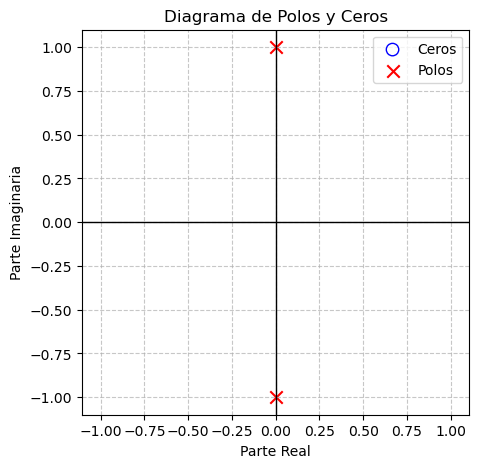

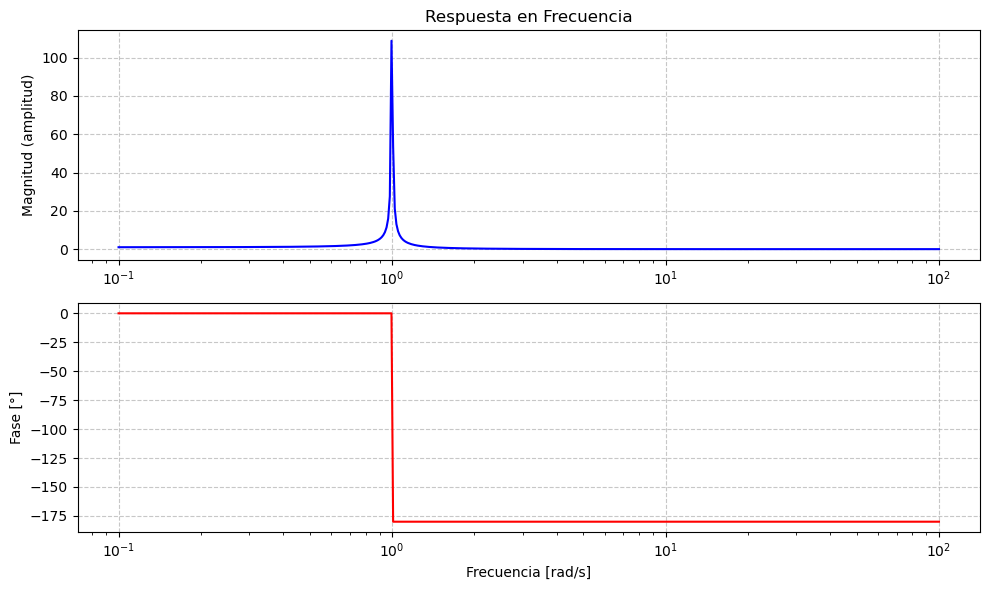

In [3]:
# ------------------ Ejemplo ------------------
# H(s) = 1 / (s^2 + 1)
num = [1]        # Numerador
den = [1, 0, 1]     # Denominador

analizar_transferencia(num, den)



Me pongo a graficar modulo y fase de $\frac{V_{21}}{V_{31}}$

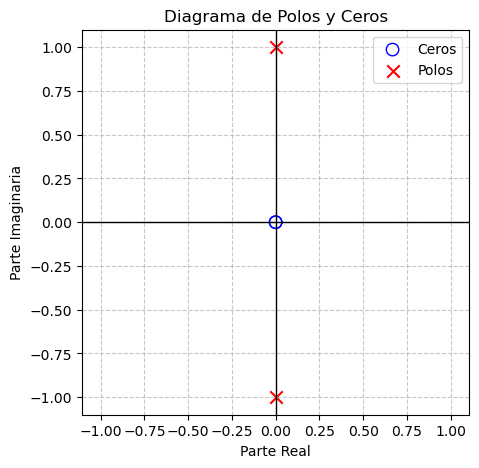

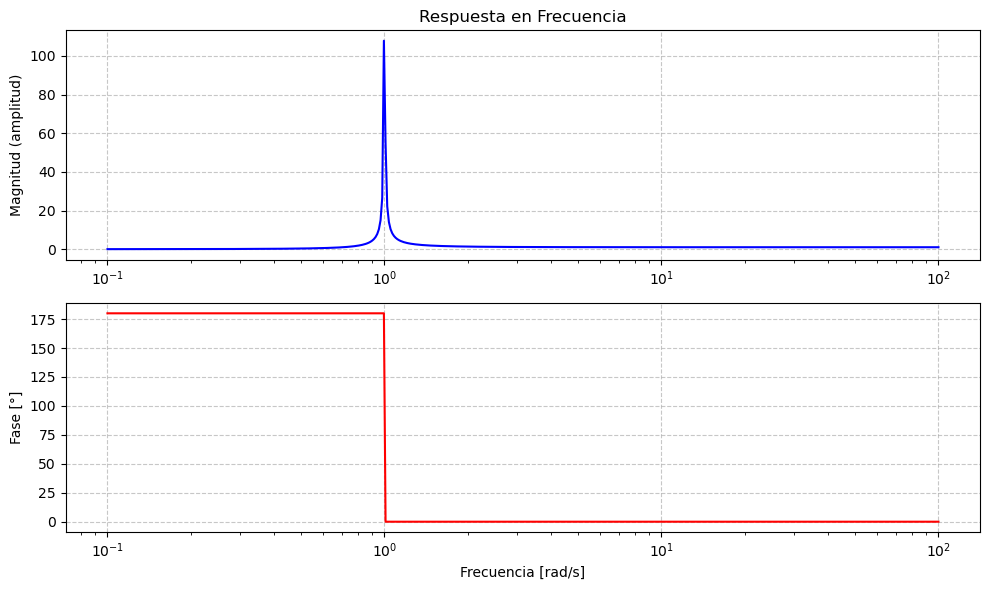

In [4]:

# H(s) = s^2/ (s^2 + 1)
num = [1,0,0]        # Numerador
den = [1, 0, 1]     # Denominador

analizar_transferencia(num, den)

Me pongo a graficar modulo y fase de $\frac{V_{12}}{V_{32}}$

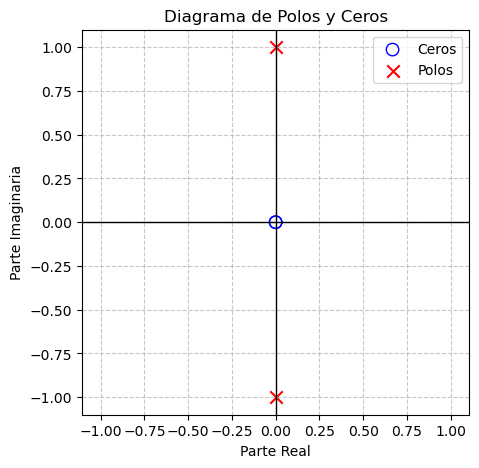

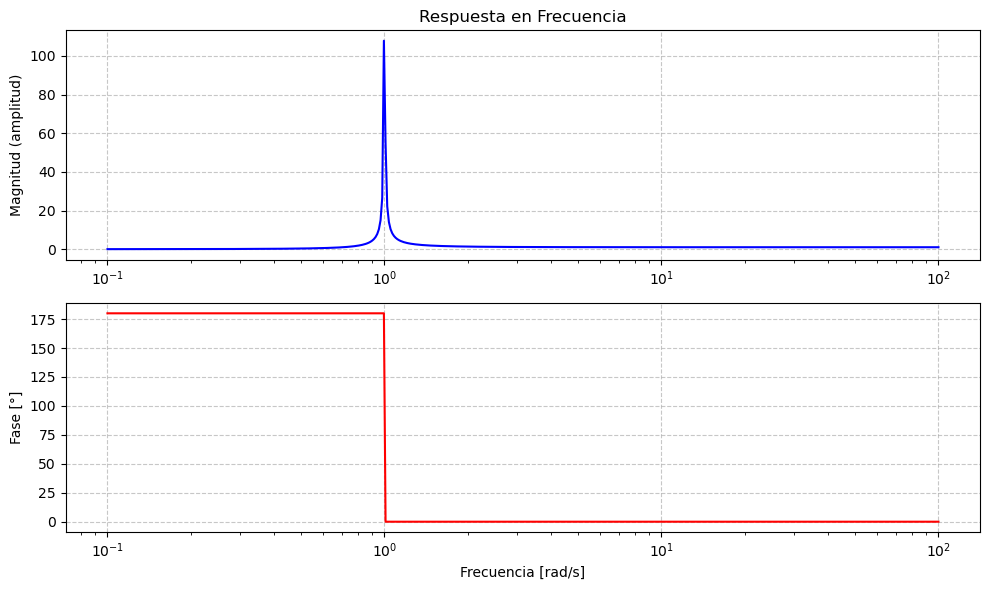

In [5]:
# H(s) = s^2 / (s^2 + 1)
num = [1,0,0]        # Numerador
den = [1, 0, 1]     # Denominador

analizar_transferencia(num, den)

Pasa algo si sumamos $\frac{V_{12}}{V_{32}}$ y $\frac{V_{23}}{V_{13}}$ en modulo o $\frac{V_{21}}{V_{31}}$ y $\frac{V_{23}}{V_{13}}$

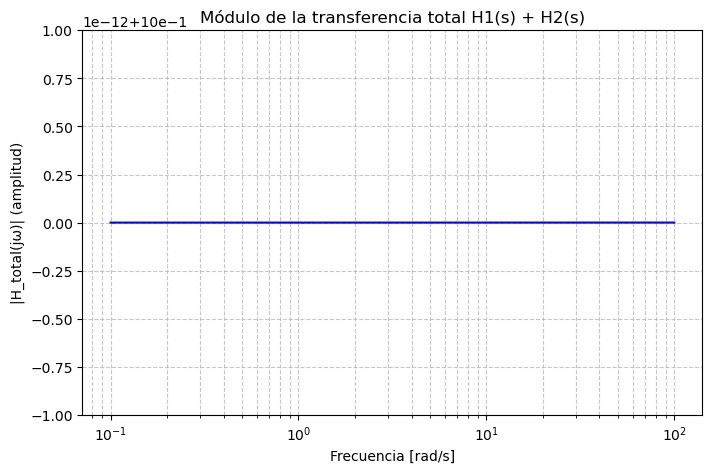

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

def sumar_y_graficar(num1, den1, num2, den2):
    """
    Suma dos funciones de transferencia y grafica el módulo de la transferencia total.
    """

    # Definir los sistemas
    sys1 = signal.TransferFunction(num1, den1)
    sys2 = signal.TransferFunction(num2, den2)

    # Definir un rango de frecuencias
    w = np.logspace(-1, 2, 500)  # de 0.1 a 100 rad/s
    _, H1 = signal.freqresp(sys1, w)
    _, H2 = signal.freqresp(sys2, w)

    # Transferencia total
    H_total = H1 + H2

    # Magnitud en amplitud
    mag = np.abs(H_total)

    # Graficar
    plt.figure(figsize=(8,5))
    plt.semilogx(w, mag, 'b')
    plt.xlabel("Frecuencia [rad/s]")
    plt.ylabel("|H_total(jω)| (amplitud)")
    plt.title("Módulo de la transferencia total H1(s) + H2(s)")
    plt.grid(True, which="both", linestyle="--", alpha=0.7)
    plt.show()


# ------------------ Ejemplo ------------------
# H1(s) = (s + 3) / (s^2 + 5s + 6)
num1 = [1]        # Numerador
den1 = [1, 0, 1]     # Denominador

# H2(s) = 2 / (s + 2)
num2 = [1,0,0]        # Numerador
den2 = [1, 0, 1]     # Denominador

sumar_y_graficar(num1, den1, num2, den2)


## Bonus #1

In [7]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Thu Aug 14 11:40:23 2025

@author: mariano

Ejemplo de análisis de red doble Tee RC en configuración notch y verificación 
via MAI y cuadripolos.
"""

import sympy as sp

from pytc2.cuadripolos import calc_MAI_vtransf_ij_mn
from pytc2.general import print_latex, s, print_subtitle, a_equal_b_latex_s


L, C = sp.symbols('L, C', complex=False)
# G = sp.symbols('G', real=True, positive=True)

# Armo la MAI

print_subtitle('Análisis via matriz admitancia indefinida')

#               Nodos: 0         1         2           3         
Ymai = sp.Matrix([  
   [ 1/(s*L)-((1/(s*L))**2)*1/(2/(s*L)+s*C),     -((1/(s*L))**2)*1/(2/(s*L)+s*C),            -(C/L)*1/(2/(s*L)+s*C)],
   [ -((1/(s*L))**2)*1/(2/(s*L)+s*C),            1/(s*L)-((1/(s*L))**2)*1/(2/(s*L)+s*C),     -(C/L)*1/(2/(s*L)+s*C)],
   [ -(C/L)*1/(2/(s*L)+s*C),                    -(C/L)*1/(2/(s*L)+s*C),                       s*C-((s**2)*(C**2))/(2/(s*L)+s*C)],
                 ])

print_latex( a_equal_b_latex_s('Y_{MAI}', Ymai ))

subs_dict = {L:1, C:1}

con_detalles = False
# con_detalles = True


# Calculo la Z en el puerto de entrada a partir de la MAI


V2313 = calc_MAI_vtransf_ij_mn(Ymai, ii=2-1, jj=3-1,mm=1-1,nn=3-1, verbose=con_detalles)


print_latex( r'T^{{ {:d}{:d} }}_{{ {:d}{:d} }} = '.format(2, 3, 1, 3) +  sp.latex(V2313) + ' = ' + sp.latex(V2313.subs(subs_dict)) )



V2131 = calc_MAI_vtransf_ij_mn(Ymai, ii=2-1, jj=1-1,mm=3-1,nn=1-1, verbose=con_detalles)


print_latex( r'T^{{ {:d}{:d} }}_{{ {:d}{:d} }} = '.format(2, 1, 3, 1) +  sp.latex(V2131) + ' = ' + sp.latex(V2131.subs(subs_dict)) )

V1232 = calc_MAI_vtransf_ij_mn(Ymai, ii=1-1, jj=2-1,mm=3-1,nn=2-1, verbose=con_detalles)


print_latex( r'T^{{ {:d}{:d} }}_{{ {:d}{:d} }} = '.format(1, 2, 3, 2) +  sp.latex(V1232) + ' = ' + sp.latex(V1232.subs(subs_dict)) )

#### Análisis via matriz admitancia indefinida

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

## Bonus #2

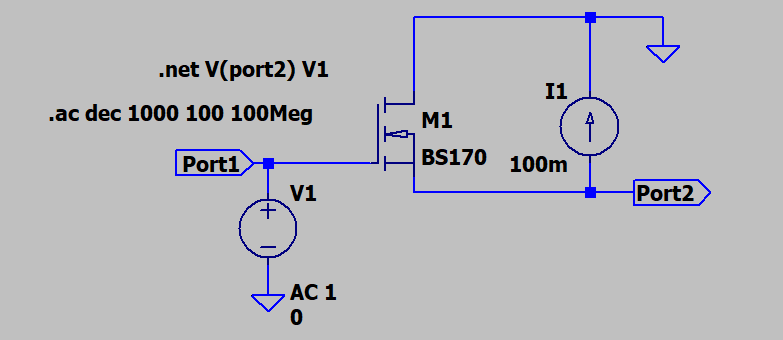

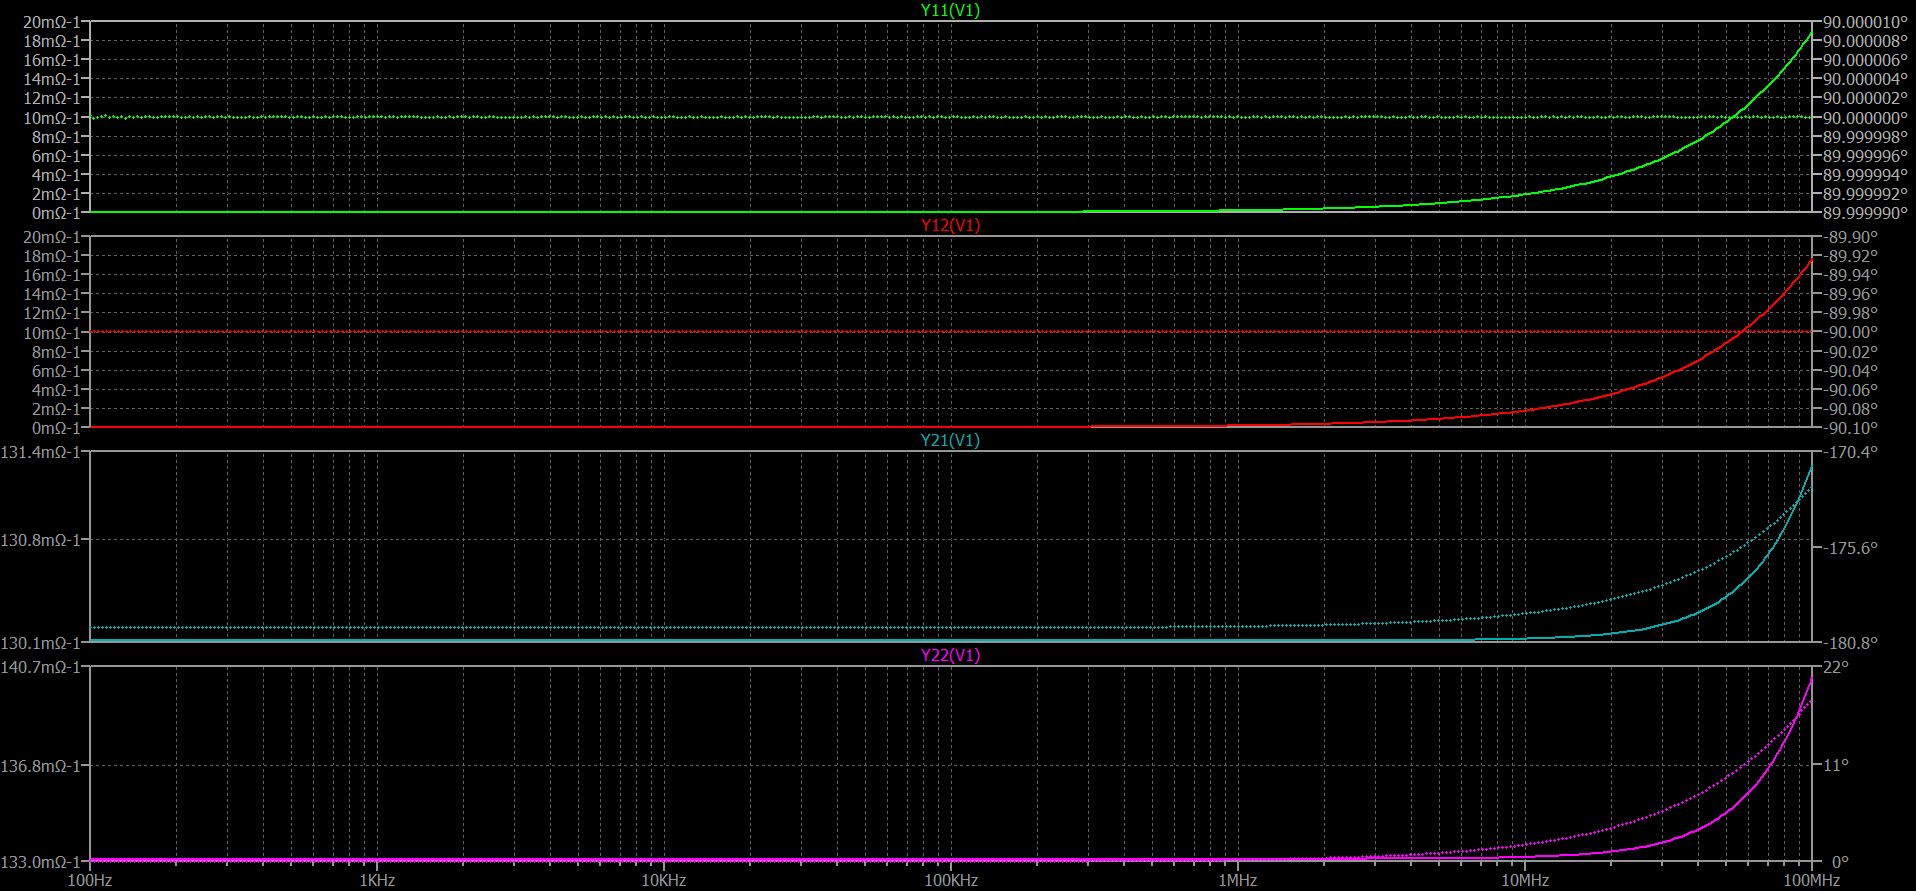

Siendo que vamos a medir en la frecuencia de 1MHZ

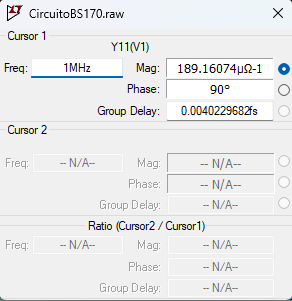

Despejando de $Y_{11}=2\pi*f*C_{iss}=182u\Omega^{-1} $
Donde da un valor de $C_{iss}=30pF$


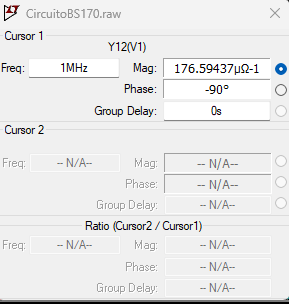

Despejando de $Y_{12}=2\pi*f*(C_{iss}-C_{rss})=176,6u\Omega^{-1} $
Donde da un valor de $C_{rss}=1.89pF$


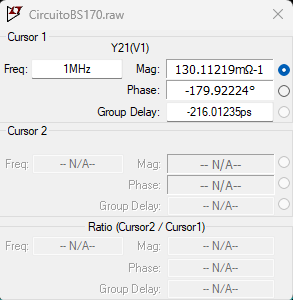

Como el angulo es casi -180 se puede asumir que gfs en ese termino es la magnitud dominante
Despejando de $Y_{12}=-g_{fs}-2\pi*f*(C_{iss}-C_{rss})$
Donde da un valor de $g_{fs}=130.11mS$

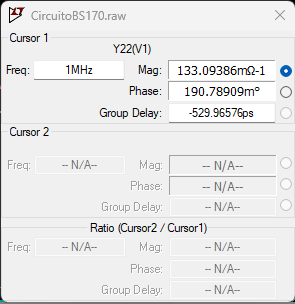

Despejando de $Y_{22}=g_{fs}-2\pi*f*(2*C_{rss}-C_{iss}-C_{oss})$
Donde conocemos la fase y el angulo, podemos sacar la parte imaginaria y trabajar desde ahi
La parte imaginaria da $443.15uS$ Entonces despejando de la expresion tenemos que
$C_{oss}=44.3pF$

Donde si bien no dan iguales a los valores del enunciado que vimos en clase, dan muy parecidos o al menos cercanos al orden, esta dispersion puede deberse a que medi los parametros con una polarizacion de 100mA, ya que en la hoja de datos no decian a que corriente estaban medidos.